In [1]:
from lib import *
import pandas as pd
import matplotlib.pyplot as plt

pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

try:
    dfs = load_data_bq()
except Exception as e:
    dfs = load_data_db()
df_contratos = dfs["contract"].sort_values("created_at")
from datetime import timedelta
df_contratos['created_at'] = df_contratos['created_at'].dt.strftime("%Y-%m-%d")
df_contratos["created_at"] = pd.to_datetime(df_contratos["created_at"])
df_contratos["day_of_week"] = df_contratos["created_at"].dt.day_name()
df_contratos["month"] = df_contratos["created_at"].dt.month_name()
df_contratos["day_record_original"] = (df_contratos["created_at"] - df_contratos["created_at"].min()).dt.days
df_contratos["enum_month"] = df_contratos["created_at"].dt.month
df_contratos["enum_day_of_week"] = df_contratos["created_at"].dt.day_of_week

df_contratos_original = df_contratos.copy()
#1m23s

Erro ao executar a query contract_canceled.sql: 403 POST https://bigquery.googleapis.com/bigquery/v2/projects/formal-purpose-354320/jobs?prettyPrint=false: Access Denied: Project formal-purpose-354320: User does not have bigquery.jobs.create permission in project formal-purpose-354320.

Location: None
Job ID: c55e8c5d-8e79-4d10-903a-b0ed632929c4

Erro geral: 403 POST https://bigquery.googleapis.com/bigquery/v2/projects/formal-purpose-354320/jobs?prettyPrint=false: Access Denied: Project formal-purpose-354320: User does not have bigquery.jobs.create permission in project formal-purpose-354320.

Location: None
Job ID: c55e8c5d-8e79-4d10-903a-b0ed632929c4

Conexão estabelecida com sucesso!


In [2]:
date_range = pd.date_range(start=df_contratos["created_at"].min(), end=pd.to_datetime("2030-12-31"), freq='D')
df_dates = pd.DataFrame(date_range, columns=["date"])
df_dates["date"] = df_dates["date"].dt.strftime("%Y-%m-%d")
df_dates["date"] = pd.to_datetime(df_dates["date"])
df_dates["month"] = df_dates["date"].dt.month_name()
df_dates["day_of_week"] = df_dates["date"].dt.day_name()
df_dates["day_record_prediction"] = (df_dates["date"] - df_contratos["created_at"].min()).dt.days
df_dates["enum_month_prediction"] = df_dates["date"].dt.month
df_dates["enum_day_of_week_prediction"] = df_dates["date"].dt.day_of_week
df_dates = df_dates.merge(df_contratos, left_on=["month", "day_of_week"], right_on=["month", "day_of_week"], how="left")
df_dates["count_by_day"] = df_dates.groupby("date")["date"].transform("count")

#2.9s

In [3]:
display(df_contratos.head())
display(df_dates.head())

,created_at,company_id,contract_id,city,state,freights_type,contract_days,vehicle,supply,day_of_week,month,day_record_original,enum_month,enum_day_of_week
6750,2019-07-24,2,1,Joinville,Santa Catarina,Viagem,1.0,Não Informado,Não Informado,Wednesday,July,0,7,2
21917,2019-07-25,2,2,Joinville,Santa Catarina,Viagem,1.0,Não Informado,Não Informado,Thursday,July,1,7,3
21948,2019-07-29,4,3,Joinville,Santa Catarina,Viagem,1.0,Não Informado,Não Informado,Monday,July,5,7,0
829,2019-07-29,4,4,Joinville,Santa Catarina,Diária,1.0,Não Informado,Não Informado,Monday,July,5,7,0
22095,2019-08-06,3,6,Joinville,Santa Catarina,Viagem,1.0,Não Informado,Não Informado,Tuesday,August,13,8,1


,date,month,day_of_week,day_record_prediction,enum_month_prediction,enum_day_of_week_prediction,created_at,company_id,contract_id,city,state,freights_type,contract_days,vehicle,supply,day_record_original,enum_month,enum_day_of_week,count_by_day
0,2019-07-24,July,Wednesday,0,7,2,2019-07-24,2,1,Joinville,Santa Catarina,Viagem,1.0,Não Informado,Não Informado,0,7,2,2035
1,2019-07-24,July,Wednesday,0,7,2,2020-07-01,22,225,Criciúma,Santa Catarina,Viagem,2.0,Não Informado,Não Informado,343,7,2,2035
2,2019-07-24,July,Wednesday,0,7,2,2020-07-01,24,226,São José dos Pinhais,Paraná,Diária,5.0,Não Informado,Não Informado,343,7,2,2035
3,2019-07-24,July,Wednesday,0,7,2,2020-07-01,24,227,São José dos Pinhais,Paraná,Diária,4.0,Não Informado,Não Informado,343,7,2,2035
4,2019-07-24,July,Wednesday,0,7,2,2020-07-01,6,228,Joinville,Santa Catarina,Diária,3.0,Não Informado,Não Informado,343,7,2,2035


2025-03-14 12:23:48.156490: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-14 12:23:48.158541: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-14 12:23:48.163602: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-14 12:23:48.177470: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741965828.199679  786059 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741965828.20

Epoch 1/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 17638.8242 - mae: 83.9355 - val_loss: 19249.2578 - val_mae: 86.9649
Epoch 2/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 18499.8457 - mae: 87.0563 - val_loss: 19148.5371 - val_mae: 86.4688
Epoch 3/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 18551.2168 - mae: 89.0291 - val_loss: 18845.7812 - val_mae: 85.5548
Epoch 4/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17482.3379 - mae: 84.9363 - val_loss: 18574.0977 - val_mae: 84.7788
Epoch 5/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 19521.9746 - mae: 90.0925 - val_loss: 18338.3340 - val_mae: 84.1452
Epoch 6/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 20166.9395 - mae: 93.2545 - val_loss: 18167.0078 - val_mae: 83.7350
Epoch 7/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17749.7910 - mae: 84.5734 - val_loss: 17933.4180 - val_mae: 83.1715
Epoch 8/1000
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17361.2461 - mae: 85.1606 - val_loss: 18016

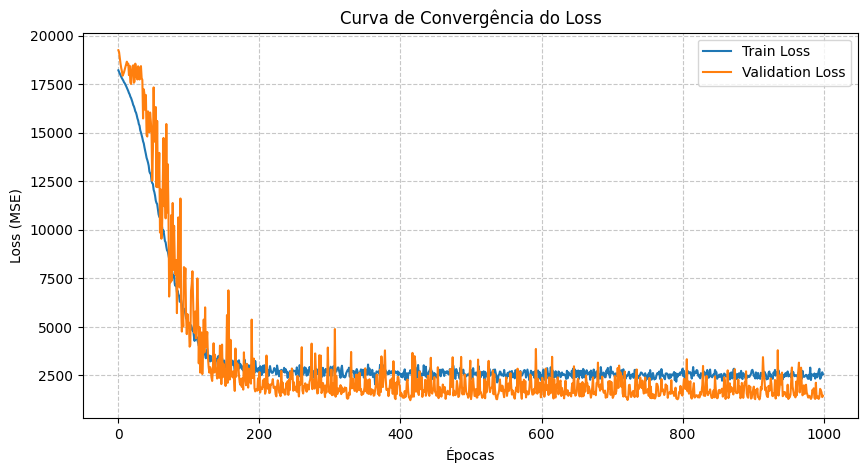

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Preparar os dados
df = df_contratos.copy()
df = df.groupby(["day_record_original", "enum_month", "enum_day_of_week"])["created_at"].count().reset_index()

# Selecionar features (entradas) e alvo (target)
features = ["day_record_original", "enum_month", "enum_day_of_week"]
X = df[features].values
y = df["created_at"].values

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from tensorflow.keras import layers, models

from tensorflow.keras import layers, models

# Modelo melhorado com Batch Normalization
model = models.Sequential()

# Camada de entrada com mais neurônios, BatchNormalization e ativação 'relu'
model.add(layers.Dense(32, input_shape=(X_train.shape[1],)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))

# Camada oculta intermediária com BatchNormalization
model.add(layers.Dense(16))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))


# Camada oculta intermediária com BatchNormalization
model.add(layers.Dense(8))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))

# Camada de saída com ativação linear (padrão para regressão)
model.add(layers.Dense(1, activation='relu'))

# Compilar o modelo
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Treinar o modelo e salvar o histórico
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=1000,
    batch_size=64,
    verbose=1
)

# Avaliar o modelo no conjunto de teste
loss, mae = model.evaluate(X_test, y_test, verbose=0)
# print(f"Test Loss (MSE): {loss:.4f} - Test MAE: {mae:.4f}")

# Fazer previsões
y_pred = model.predict(X_test)
# print("Previsões:", y_pred.flatten())

# Plotar a curva de convergência do loss
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Curva de Convergência do Loss')
plt.xlabel('Épocas')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


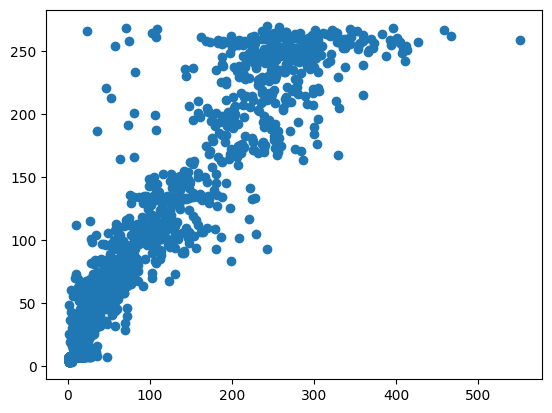

In [5]:
df = df_contratos.copy()
df = df.groupby(["day_record_original", "enum_month", "enum_day_of_week"])["created_at"].count().reset_index()
features = ["day_record_original", "enum_month", "enum_day_of_week"]
X = df[features].values
# scaler = MinMaxScaler()
# X_scaled = scaler.fit_transform(X)
y_pred = model.predict(X)
df["pred"] = y_pred
plt.scatter(df["created_at"], df["pred"])

54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Text(0.5, 1.0, 'Ajuste do modelo aos dados reais')

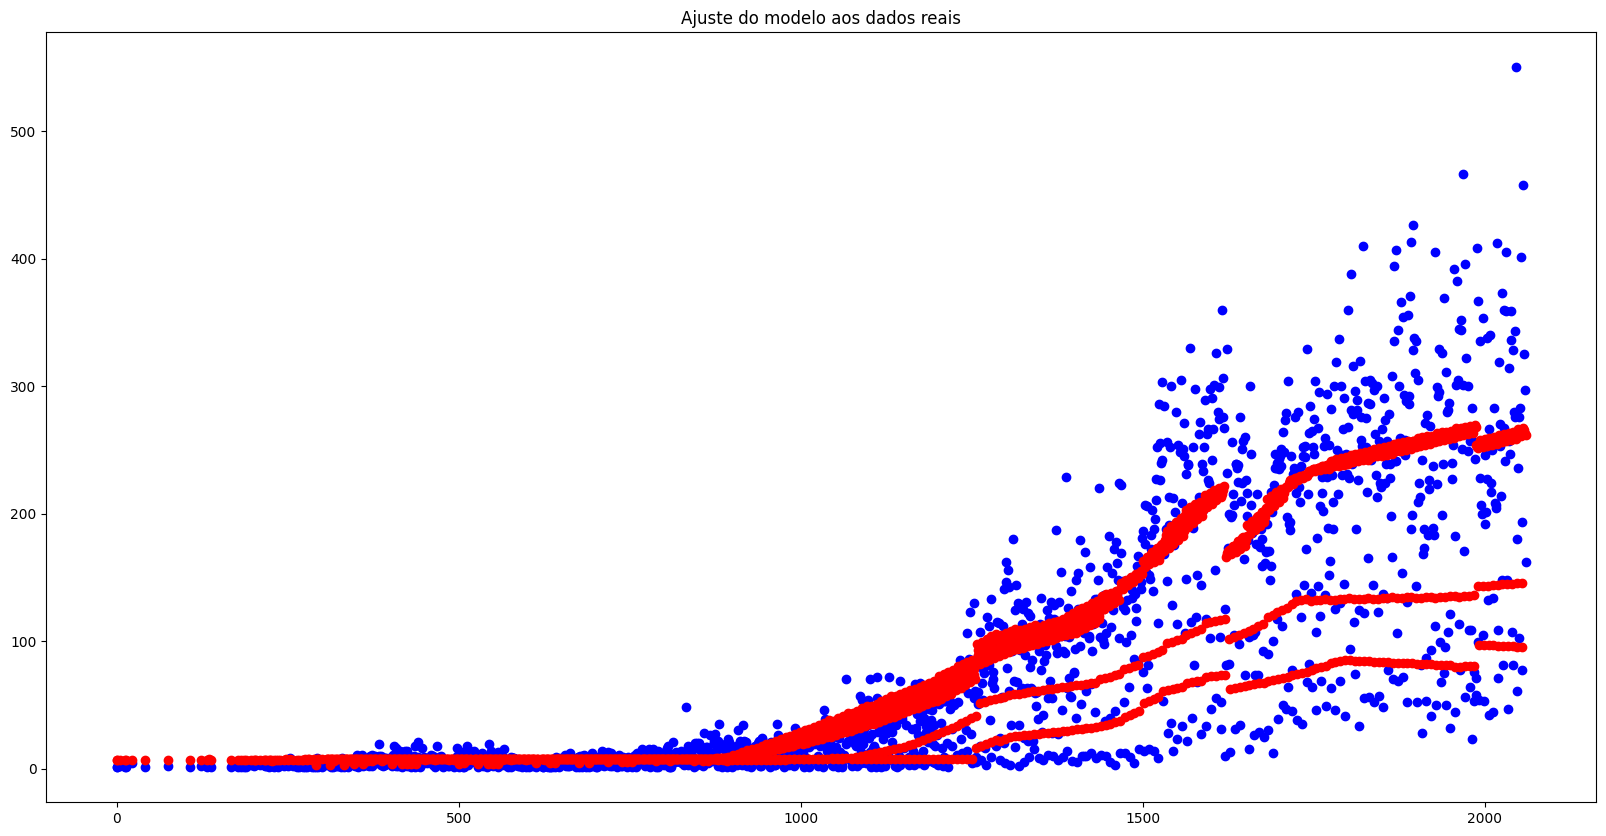

In [6]:
df = df_contratos.copy()
df = df.groupby(["day_record_original", "enum_month", "enum_day_of_week"])["created_at"].count().reset_index()
df["day_record_original"]  = df["day_record_original"]
features = ["day_record_original", "enum_month", "enum_day_of_week"]
X = df[features].values
y_pred = model.predict(X)
df["pred"] = y_pred


plt.figure(figsize=(20, 10))
plt.scatter(df["day_record_original"], df["created_at"], color="blue", label="Dados originais")
plt.scatter(df["day_record_original"], df["pred"], color="red", label="Modelo ajustado")
plt.title("Ajuste do modelo aos dados reais")


In [7]:
df = df_dates.copy()
df = df.sample(50000)
features = ["day_record_prediction", "enum_month", "enum_day_of_week"]
X = df[features].values
y_pred = model.predict(X)

df_dates = df.copy()
df_dates["num_of_contracts_predict"] = y_pred
df_dates["weight"] =  df_dates["count_by_day"] / 2153 * df_dates["num_of_contracts_predict"] 
df_dates["weight"] = df_dates["weight"] / df_dates.groupby("day_record_prediction")["num_of_contracts_predict"].transform("count")
#7,8s

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


,day_record_original,created_at
0,0,1
1,1,1
2,5,2
3,13,1
4,14,1


,day_record_prediction,weight
0,0,6.107574
1,1,5.122424
2,2,6.966289
3,3,2.216350
4,4,0.299458


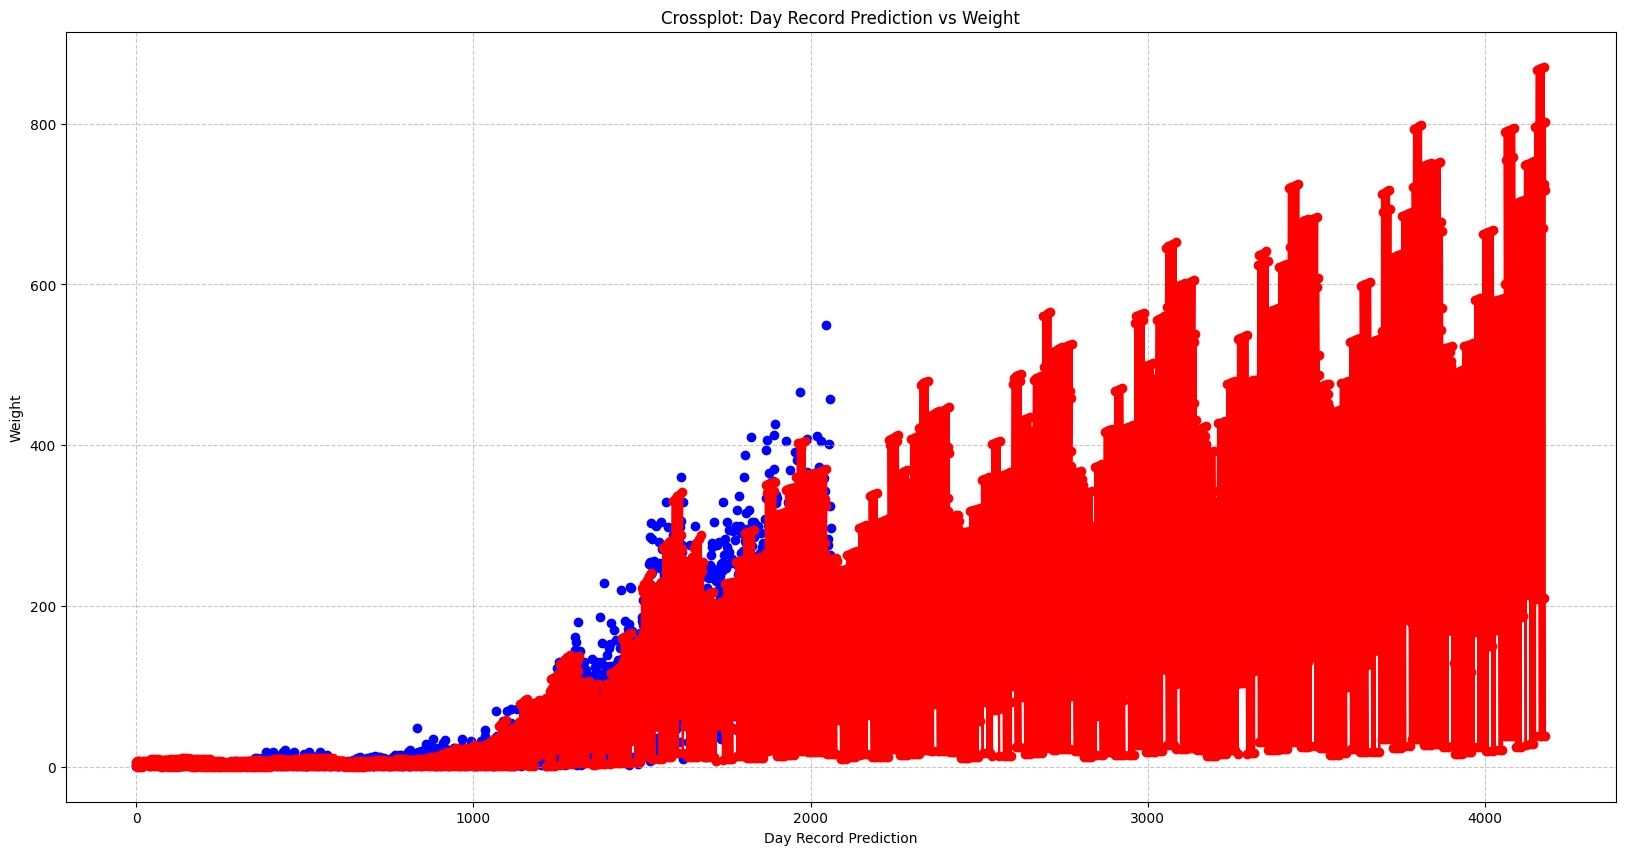

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


df = df_contratos.copy()
df = df.groupby("day_record_original")["created_at"].count().reset_index()
display(df.head())
plt.figure(figsize=(20, 10))

plt.scatter(df["day_record_original"], df["created_at"], color="blue", marker="o")
plt.xlabel("Day Record Prediction")
plt.ylabel("Weight")
plt.title("Crossplot: Day Record Prediction vs Weight")
plt.grid(True, linestyle="--", alpha=0.7)


df = df_dates.copy()
df = df.groupby("day_record_prediction")["weight"].sum().reset_index()



display(df.head())

plt.plot(df["day_record_prediction"], df["weight"], color="red", marker="o")
plt.xlabel("Day Record Prediction")
plt.ylabel("Weight")
plt.title("Crossplot: Day Record Prediction vs Weight")
plt.grid(True, linestyle="--", alpha=0.7)
N = 1000
# plt.xlim([2000-N,2000])
plt.show()


In [9]:
df_dates.head()

,date,month,day_of_week,day_record_prediction,enum_month_prediction,enum_day_of_week_prediction,created_at,company_id,contract_id,city,state,freights_type,contract_days,vehicle,supply,day_record_original,enum_month,enum_day_of_week,count_by_day,num_of_contracts_predict,weight
415831,2020-02-19,February,Wednesday,210,2,2,2024-02-28,372,67357,Contagem,Minas Gerais,Diária,4.0,Truck,Baú,1680,2,2,2292,6.838726,0.520017
31471,2019-08-12,August,Monday,19,8,0,2023-08-28,608,34472,Contagem,Minas Gerais,Coleta/Entrega,2.0,3/4,Caçamba,1496,8,0,1962,6.408425,0.530901
2875721,2023-12-21,December,Thursday,1611,12,3,2022-12-01,568,11465,São José dos Pinhais,Paraná,Diária,2.0,Carreta LS,Sider,1226,12,3,2646,218.534180,15.798515
210000,2019-11-14,November,Thursday,113,11,3,2024-11-07,2695,120768,Aparecida de Goiânia,Goiás,Ajudante,2.0,Não Informado,Não Informado,1933,11,3,2463,7.006631,0.400774
1750804,2022-03-14,March,Monday,964,3,0,2025-03-10,948,148375,Cubatão,São Paulo,Diária,21.0,Carreta LS,Porta Bobina,2056,3,0,2048,21.474888,1.459113


In [11]:

df = df_dates.copy()
df = df.groupby("day_of_week")["weight"].sum().astype(int).reset_index()
display(df.head(12))




df = df_contratos.copy()
df = df.groupby("day_of_week")["created_at"].count().reset_index()
display(df.head(12))

,day_of_week,weight
0,Friday,178876
1,Monday,171178
2,Saturday,41987
3,Sunday,7014
4,Thursday,147035
5,Tuesday,148521
6,Wednesday,142316


,day_of_week,created_at
0,Friday,30385
1,Monday,28347
2,Saturday,12802
3,Sunday,4433
4,Thursday,24749
5,Tuesday,24652
6,Wednesday,23826
